# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [2]:
df = pd.read_csv("data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [5]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

In [6]:
df.國文

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

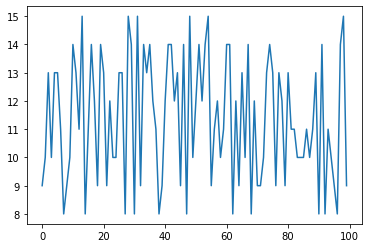

In [7]:
df.國文.plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

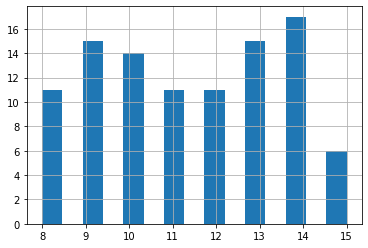

In [8]:
df.國文.hist(bins=15)

## 3 一些基本的資料分析

算平均。

In [9]:
df.國文.mean()

11.39

算標準差。

In [10]:
df.國文.std()

2.1968526614594834

不如就該算的都幫我們算算...

In [11]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [12]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

In [16]:
df.國文.corr(df.數學)

-0.3108989822179331

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [14]:
df["總級分"] = df.sum(axis = 1)
df.head()

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,114
1,胡玉華,10,10,10,8,9,94
2,黃淑婷,13,15,8,11,14,122
3,陳上紫,10,10,8,9,14,102
4,崔靜成,13,12,14,12,13,128


### 【技巧】

有計算的當然也可以的。

In [15]:
df["加權"] = df.國文+df.英文+df.數學*2

In [16]:
df.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
0,劉俊安,9,10,15,10,13,114,49
1,胡玉華,10,10,10,8,9,94,40
2,黃淑婷,13,15,8,11,14,122,44
3,陳上紫,10,10,8,9,14,102,36
4,崔靜成,13,12,14,12,13,128,53


## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

In [17]:
df.sort_values(by = ["加權","總級分"],ascending = False).head(10)

,姓名,國文,英文,數學,自然,社會,總級分,加權
80,施雅鈴,13,15,12,13,13,132,52
12,李正偉,11,15,11,14,15,132,48
54,陳怡潔,15,15,9,15,11,130,48
25,蔡亦瑄,13,13,14,13,12,130,54
57,胡淳茜,12,15,14,13,11,130,55
37,曾怡君,11,12,15,13,14,130,53
48,陳怡婷,15,14,12,9,15,130,53
64,俞志峰,9,14,13,14,15,130,49
83,李士賢,10,14,15,13,13,130,54
87,趙偉希,10,13,14,13,15,130,51


### 【重點】排序的方法

加權分最高, 同分才看總級分

In [18]:
df2 = df.sort_values(by = ["加權","總級分"],ascending = False)

### 【重點】重設 index

In [19]:
df2.index = range(1,101)
df2.head()

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,118,58
2,胡淳茜,12,15,14,13,11,130,55
3,詹威德,12,13,15,10,14,128,55
4,蔡亦瑄,13,13,14,13,12,130,54
5,李士賢,10,14,15,13,13,130,54


## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [20]:
df2[df2.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,118,58
3,詹威德,12,13,15,10,14,128,55
5,李士賢,10,14,15,13,13,130,54
7,曾怡君,11,12,15,13,14,130,53
10,林哲法,14,9,15,10,14,124,53
13,陳竹伯,10,12,15,10,14,122,52
15,葉儀依,9,13,15,8,14,118,52
18,周育霖,9,12,15,13,12,122,51
21,張雅彬,10,11,15,12,8,112,51
22,芮秋辛,11,10,15,10,8,108,51


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [21]:
df2[(df2.數學==15) & (df2.英文==15)]

,姓名,國文,英文,數學,自然,社會,總級分,加權
1,吳志遠,13,15,15,8,8,118,58


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

In [23]:
df2 = df2.drop("總級分",axis=1)
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

In [ ]:
df2.drop("總級分",axis=1,inplace = True)
df2

### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

In [27]:
df2[df2.姓名=="李士賢"]
df2

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


In [28]:
df2.drop(df2[df2.姓名=="李士賢"].index)

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


### 【重點】刪掉一列


通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
5,李士賢,10,14,15,13,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


,姓名,國文,英文,數學,自然,社會,加權
1,吳志遠,13,15,15,8,8,58
2,胡淳茜,12,15,14,13,11,55
3,詹威德,12,13,15,10,14,55
4,蔡亦瑄,13,13,14,13,12,54
6,童心怡,13,13,14,8,13,54
...,...,...,...,...,...,...,...
96,陳上紫,10,10,8,9,14,36
97,胡凱琳,10,8,9,9,15,36
98,林建亨,9,11,8,8,11,36
99,梁慧君,9,8,8,8,12,33


## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [1]:
from IPython.core.display import HTML

In [ ]:
HTML("<script>Jupyter.notebook.kernel.restart()</script>")

In [1]:
conda install -c anaconda pandas-datareader 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - pandas-datareader


The following NEW packages will be INSTALLED:

  pandas-datareader  anaconda/noarch::pandas-datareader-0.9.0-py_0

The following packages will be UPDATED:

  conda                                4.9.2-py38haa95532_0 --> 4.10.3-py38haa95532_0

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main --> anaconda
  openssl                                         pkgs/main --> anaconda


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [2]:
conda update pandas-datareader

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - pandas-datareader


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    backports.functools_lru_cache-1.6.4|     pyhd3eb1b0_0           9 KB
    backports.tempfile-1.0     |     pyhd3eb1b0_1          11 KB
    conda-package-handling-1.7.3|   py38h8cc25b3_1         721 KB
    xmltodict-0.12.0           |     pyhd3eb1b0_0          13 KB
    ------------------------------------------------------------
                                           Total:         754 KB

The following packages will be UPDATED:

  backports.functoo~                             1.6.1-py_0 --> 1.6.4-pyhd3eb1b0_0
  conda-package-han~                   1.7.2-py38h76e460a_0 --> 1.7.3-py38h8cc25b3_1
  pandas-datareader

In [2]:
conda install pandas-datareader

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - pandas-datareader


The following NEW packages will be INSTALLED:

  pandas-datareader  pkgs/main/noarch::pandas-datareader-0.10.0-pyhd3eb1b0_0

The following packages will be UPDATED:

  conda                                4.9.2-py38haa95532_0 --> 4.10.3-py38haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [4]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo("AAPL")

In [2]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [5]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-09-19,29.045000,28.312500,28.797501,28.395000,188092000.0,26.629980
2016-09-20,28.530001,28.127501,28.262501,28.392500,138057200.0,26.627634
2016-09-21,28.497499,28.110001,28.462500,28.387501,144012800.0,26.622948
2016-09-22,28.735001,28.500000,28.587500,28.655001,124296000.0,26.873819
2016-09-23,28.697500,27.887501,28.605000,28.177500,209924800.0,26.426001


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-05-23,24.297501,23.917500,23.967501,24.107500,152074400.0,22.520861
2016-05-24,24.522499,24.209999,24.305000,24.475000,140560800.0,22.864182
2016-05-25,24.934999,24.527500,24.667500,24.905001,152675200.0,23.265877
2016-05-26,25.182501,24.660000,24.920000,25.102501,225324800.0,23.450378
2016-05-27,25.117500,24.812500,24.860001,25.087500,145364800.0,23.436363


#### 只要最後 300 個交易日!

In [6]:
df = df[-300:]
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-13,99.955002,95.257500,97.264999,95.477501,191649200.0,94.696594
2020-07-14,97.254997,93.877502,94.839996,97.057503,170989200.0,96.263672
2020-07-15,99.247498,96.489998,98.989998,97.724998,153198000.0,96.925705
2020-07-16,97.404999,95.904999,96.562500,96.522499,110577600.0,95.733040
2020-07-17,97.147499,95.839996,96.987503,96.327499,92186800.0,95.539635
...,...,...,...,...,...,...
2021-09-13,151.419998,148.750000,150.630005,149.550003,102404300.0,149.550003
2021-09-14,151.070007,146.910004,150.350006,148.119995,109296300.0,148.119995
2021-09-15,149.440002,146.369995,148.559998,149.029999,83281300.0,149.029999


#### 20 日的移動平均

<bound method Rolling.mean of Rolling [window=20,center=False,axis=0]>

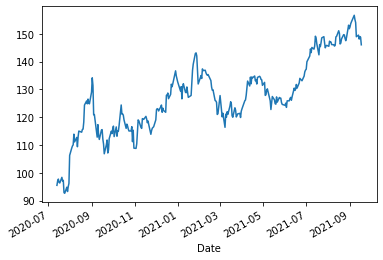

In [9]:
df.Close.plot()
df.Close.rolling(20).mean
# df.Close.rolling(20).mean().plot()

<AxesSubplot:xlabel='Date'>

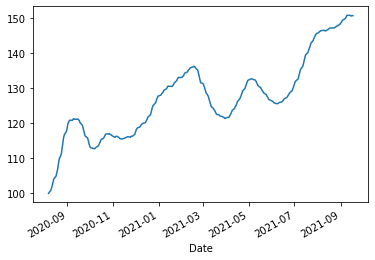

In [10]:
df.Close.rolling(20).mean().plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

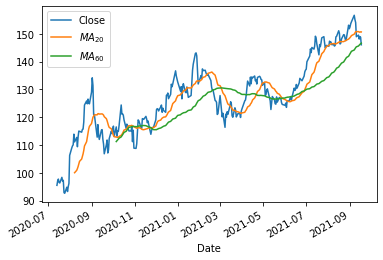

In [11]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


In [12]:
close = df.Close.values

len(close)

300

In [14]:
x = close[:-1]
len(x)

299

In [15]:
y = close[1:]
len(y)

299

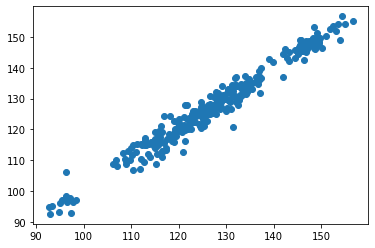

In [16]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [31]:
import numpy as np
mydata = np.random.randn(4,3)

In [32]:
mydata

array([[ 0.41942275, -0.08420083,  0.12210416],
       [-1.33904969,  2.15814385, -0.49883102],
       [ 0.6638816 , -0.35543398,  1.30215485],
       [-0.04894391,  1.31307244,  0.78288414]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [33]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [34]:
df2

,A,B,C
0,0.419423,-0.084201,0.122104
1,-1.339050,2.158144,-0.498831
2,0.663882,-0.355434,1.302155
3,-0.048944,1.313072,0.782884


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [35]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [36]:
df3

,A,B,C
0,-0.195409,0.488344,0.574736
1,0.183305,0.551095,0.846429
2,-0.386594,-0.435571,-0.983514


In [37]:
df4 = pd.concat([df2,df3],axis=0)

In [38]:
df4

,A,B,C
0,0.419423,-0.084201,0.122104
1,-1.339050,2.158144,-0.498831
2,0.663882,-0.355434,1.302155
3,-0.048944,1.313072,0.782884
0,-0.195409,0.488344,0.574736
1,0.183305,0.551095,0.846429
2,-0.386594,-0.435571,-0.983514


前面我們弄得亂七八糟的 index 重設一下。

In [39]:
df4.index = range(7)

In [40]:
df4

,A,B,C
0,0.419423,-0.084201,0.122104
1,-1.339050,2.158144,-0.498831
2,0.663882,-0.355434,1.302155
3,-0.048944,1.313072,0.782884
4,-0.195409,0.488344,0.574736
5,0.183305,0.551095,0.846429
6,-0.386594,-0.435571,-0.983514


#### 横向的貼

In [41]:
df5 = pd.concat([df2,df3],axis=1)

等等, 這大小好像不太對也可以嗎? 答案是可以的!

In [42]:
df5

,A,B,C,A,B,C
0,0.419423,-0.084201,0.122104,-0.195409,0.488344,0.574736
1,-1.339050,2.158144,-0.498831,0.183305,0.551095,0.846429
2,0.663882,-0.355434,1.302155,-0.386594,-0.435571,-0.983514
3,-0.048944,1.313072,0.782884,NaN,NaN,NaN


#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [104]:
df_names = pd.read_csv("data/names.csv",names=["姓名"])
df_names = pd.read_csv("data/grade2.csv")

In [105]:
df_names.head()

,Unnamed: 0,國文,英文,數學,社會,自然
0,0,12,6,6,8,12
1,1,10,6,13,13,6
2,2,11,14,13,13,11
3,3,10,13,13,14,12
4,4,8,13,14,9,13


In [106]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [107]:
df_grades

,國文,英文,數學,社會,自然
0,14,10,10,14,8
1,13,14,7,12,15
2,8,11,12,12,6
3,10,14,15,6,13
4,12,12,14,14,7
...,...,...,...,...,...
95,10,12,14,7,9
96,8,15,9,10,8
97,11,15,12,13,15
98,8,15,15,11,12


In [108]:
df_grades.to_csv("data/grade2.csv",index=0)

In [109]:
df_grades

,國文,英文,數學,社會,自然
0,14,10,10,14,8
1,13,14,7,12,15
2,8,11,12,12,6
3,10,14,15,6,13
4,12,12,14,14,7
...,...,...,...,...,...
95,10,12,14,7,9
96,8,15,9,10,8
97,11,15,12,13,15
98,8,15,15,11,12


In [110]:
df_x = pd.concat([df_names,df_grades],axis=1)

In [111]:
df_x

,Unnamed: 0,國文,英文,數學,社會,自然,國文,英文,數學,社會,自然
0,0,12,6,6,8,12,14,10,10,14,8
1,1,10,6,13,13,6,13,14,7,12,15
2,2,11,14,13,13,11,8,11,12,12,6
3,3,10,13,13,14,12,10,14,15,6,13
4,4,8,13,14,9,13,12,12,14,14,7
...,...,...,...,...,...,...,...,...,...,...,...
95,95,11,9,13,14,10,10,12,14,7,9
96,96,14,9,12,11,9,8,15,9,10,8
97,97,15,8,13,14,14,11,15,12,13,15
98,98,8,11,9,7,10,8,15,15,11,12
